# 📘 Parquet Feature Exploration
Friendly visualizations to better understand your merged `features_all.parquet` file.

In [5]:
# 📦 Setup
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 Load the merged Parquet
# parquet_path = "features_all.parquet"
parquet_path = "/tmp/pytest-of-codespace/pytest-8/test_generate_feature_parquets0/features_parquet/features_all.parquet"
df = pl.read_parquet(parquet_path)

# 🔁 Convert to pandas for viz (optional)
pdf = df.to_pandas()

# 👀 Preview data
pdf.head()


,ticker,6m_return,12m_return,volatility,max_drawdown_1y,sector_relative_6m,sma_50_200_delta,net_debt_to_ebitda,ebit_interest_cover,ebit_interest_cover_capped,...,pe_ratio,pfcf_ratio,payout_ratio,country,has_eps_cagr_3y,has_fcf_cagr_3y,has_dividend_yield,has_dividend_cagr_3y,has_dividend_cagr_5y,has_ebit_interest_cover
0,AAPL,0.10,0.20,0.30,0.4,0.5,0.6,1.0,5.0,5.0,...,15.0,12.0,0.4,US,1,1,1,1,1,1
1,MSFT,0.15,0.25,0.35,0.4,0.5,0.6,1.0,5.0,5.0,...,15.0,12.0,0.4,US,1,1,1,1,1,1


In [6]:
print(pdf[["ticker", "6m_return", "12m_return", "volatility", "dividend_yield"]])


  ticker  6m_return  12m_return  volatility  dividend_yield
0   AAPL       0.10        0.20        0.30            0.03
1   MSFT       0.15        0.25        0.35            0.03


In [7]:
# 📊 Basic Info
print("Shape:", pdf.shape)
print("\nColumn types:\n", pdf.dtypes)
pdf.describe(include='all').T


Shape: (2, 26)

Column types:
 ticker                         object
6m_return                     float64
12m_return                    float64
volatility                    float64
max_drawdown_1y               float64
sector_relative_6m            float64
sma_50_200_delta              float64
net_debt_to_ebitda            float64
ebit_interest_cover           float64
ebit_interest_cover_capped    float64
eps_cagr_3y                   float64
fcf_cagr_3y                   float64
dividend_yield                float64
dividend_cagr_3y              float64
dividend_cagr_5y              float64
yield_vs_5y_median            float64
pe_ratio                      float64
pfcf_ratio                    float64
payout_ratio                  float64
country                        object
has_eps_cagr_3y                 int64
has_fcf_cagr_3y                 int64
has_dividend_yield              int64
has_dividend_cagr_3y            int64
has_dividend_cagr_5y            int64
has_ebit_interest_c

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ticker,2,2,AAPL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6m_return,2.0,NaN,NaN,NaN,0.125,0.035355,0.1,0.1125,0.125,0.1375,0.15
12m_return,2.0,NaN,NaN,NaN,0.225,0.035355,0.2,0.2125,0.225,0.2375,0.25
volatility,2.0,NaN,NaN,NaN,0.325,0.035355,0.3,0.3125,0.325,0.3375,0.35
max_drawdown_1y,2.0,NaN,NaN,NaN,0.4,0.0,0.4,0.4,0.4,0.4,0.4
sector_relative_6m,2.0,NaN,NaN,NaN,0.5,0.0,0.5,0.5,0.5,0.5,0.5
sma_50_200_delta,2.0,NaN,NaN,NaN,0.6,0.0,0.6,0.6,0.6,0.6,0.6
net_debt_to_ebitda,2.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
ebit_interest_cover,2.0,NaN,NaN,NaN,5.0,0.0,5.0,5.0,5.0,5.0,5.0
ebit_interest_cover_capped,2.0,NaN,NaN,NaN,5.0,0.0,5.0,5.0,5.0,5.0,5.0


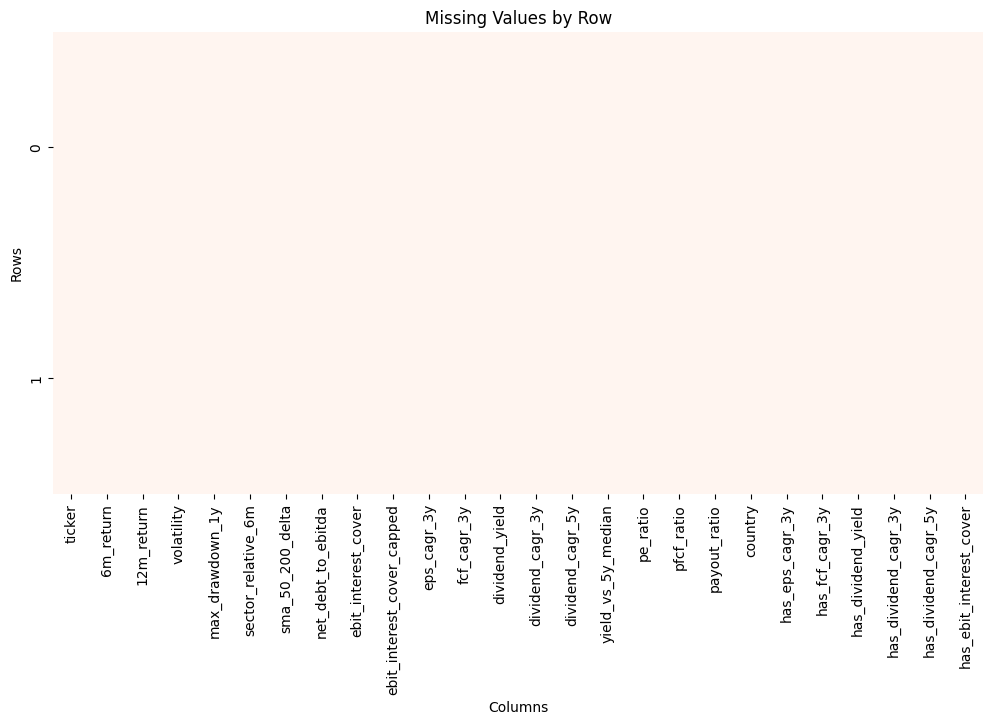

In [8]:
# 🧼 Null Values Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pdf.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values by Row")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


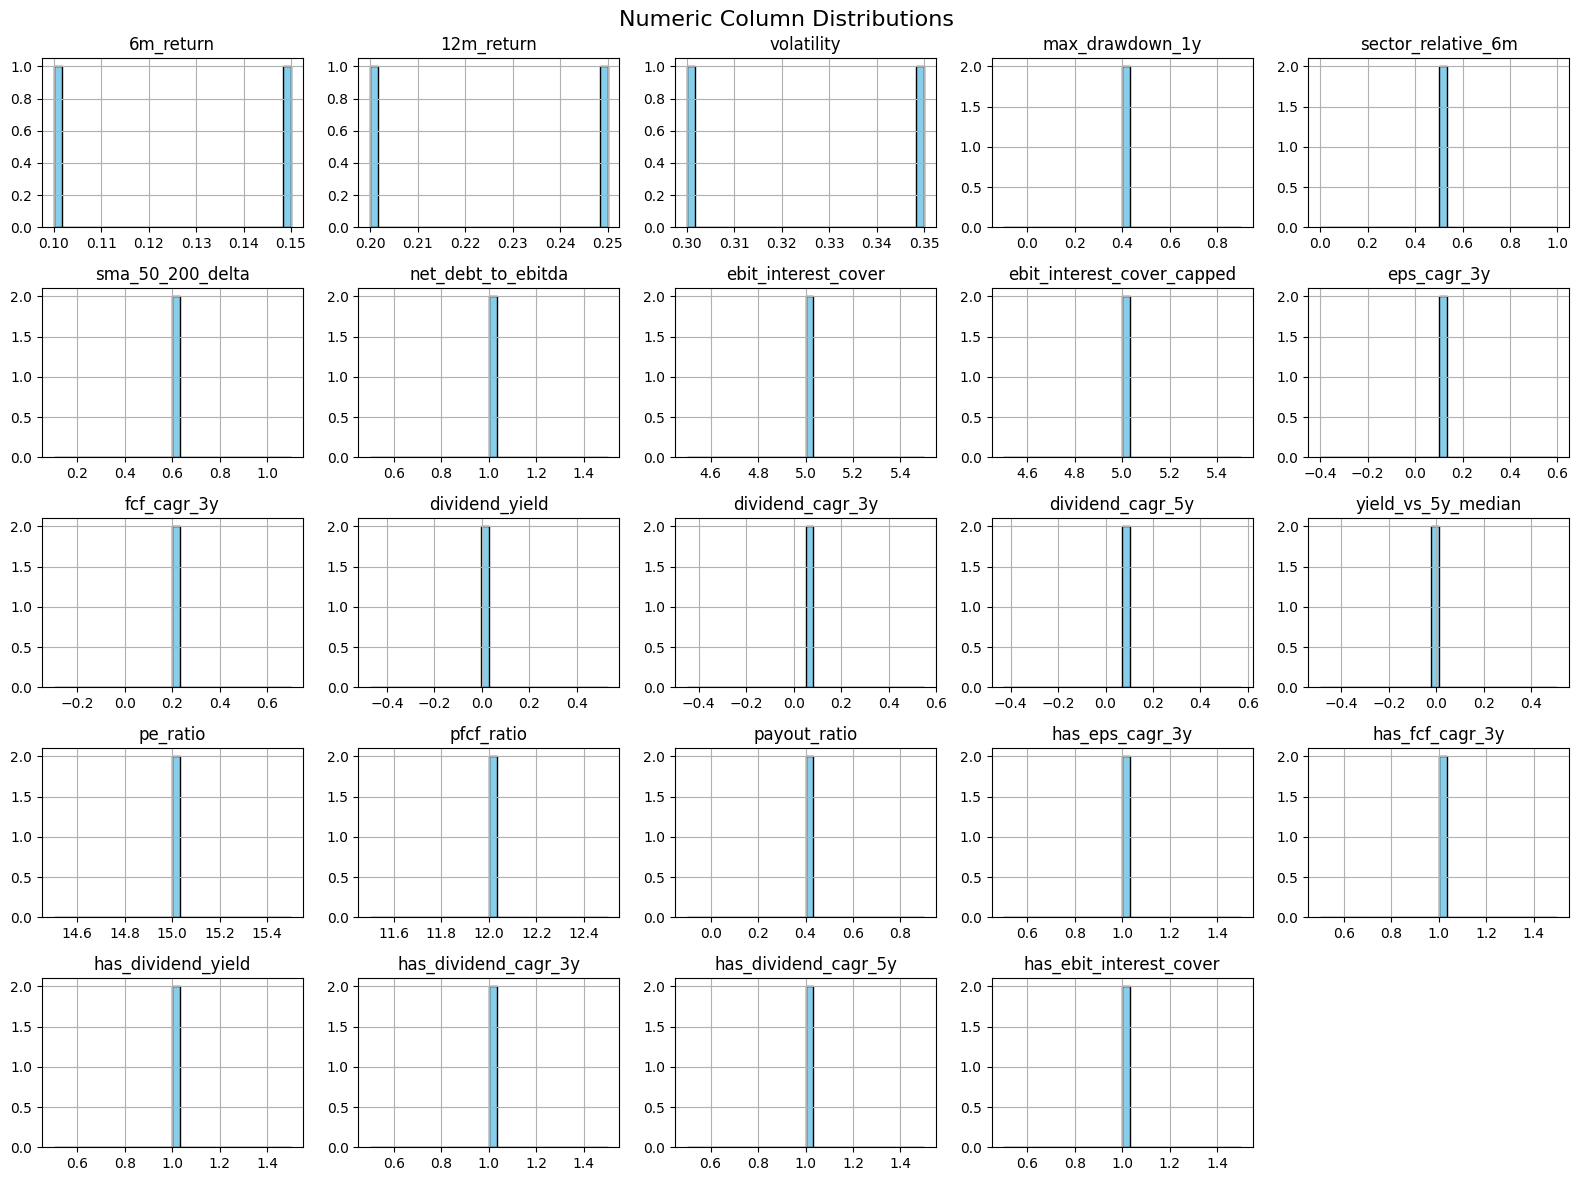

In [9]:
# 📈 Histograms of numeric columns
pdf.select_dtypes(include=["number"]).hist(
    figsize=(16, 12), bins=30, edgecolor='black', color='skyblue'
)
plt.suptitle("Numeric Column Distributions", fontsize=16)
plt.tight_layout()
plt.show()


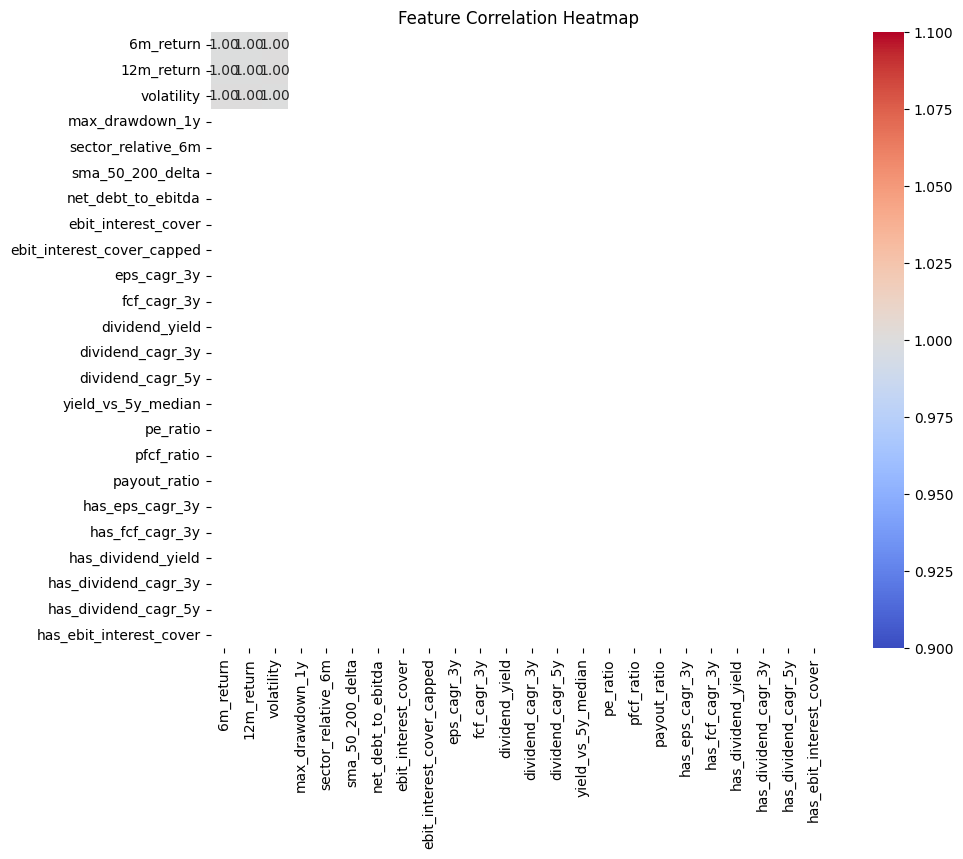

In [10]:
# 🔗 Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pdf.select_dtypes(include="number").corr(),
    annot=True, fmt=".2f", cmap="coolwarm",
    square=True, cbar=True
)
plt.title("Feature Correlation Heatmap")
plt.show()


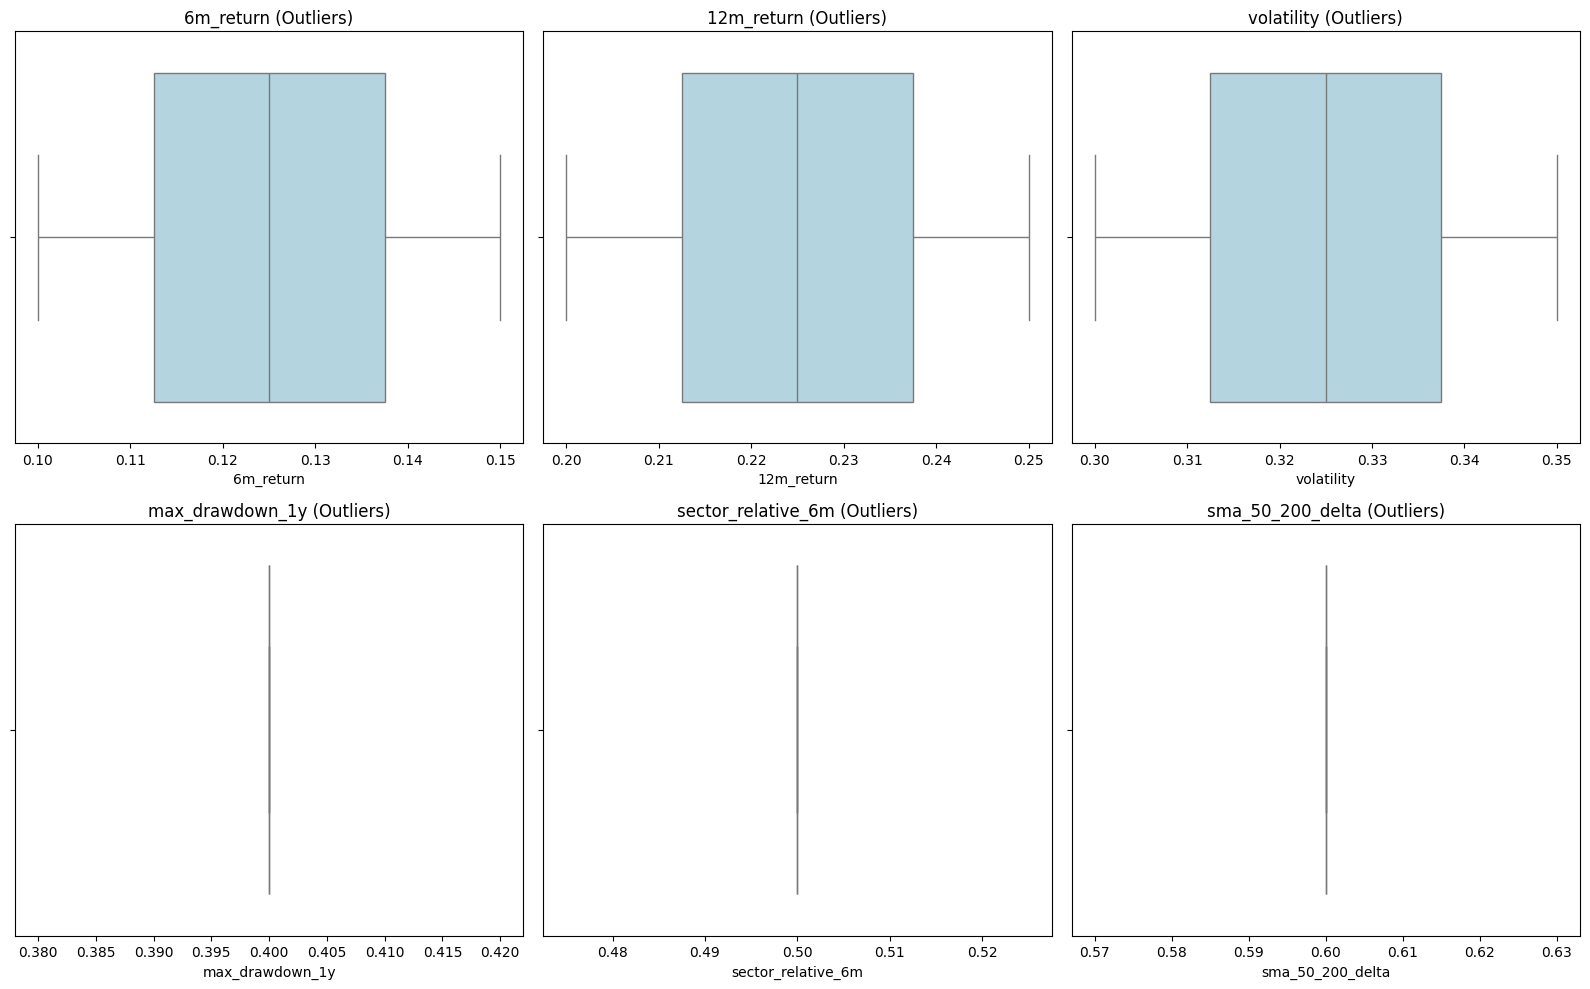

In [11]:
# 🚨 Outlier detection (simple boxplots)
numeric_cols = pdf.select_dtypes(include="number").columns[:6]  # limit to first 6 for readability

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=pdf[col], color="lightblue")
    plt.title(f"{col} (Outliers)")
plt.tight_layout()
plt.show()


In [12]:
# 🧪 Check for duplicate rows or tickers
if "ticker" in pdf.columns:
    dupe_count = pdf.duplicated(subset="ticker").sum()
    print(f"Duplicate ticker entries: {dupe_count}")
else:
    print("No 'ticker' column found.")


Duplicate ticker entries: 0
